In [5]:
!pip install ultralytics

In [6]:
from ultralytics import YOLO
import os
import glob
import random
import matplotlib.pyplot as plt
import cv2

# Define dataset path
DATASET_PATH = "/kaggle/input/lung-cancer/Lungnew"
TEST_PATH = os.path.join(DATASET_PATH, "test")

# Load a YOLOv8 classification model (using 'u' version)
model = YOLO("yolov8l-cls.pt")  # Example using the nano model





In [7]:
print(model.yaml)


{'nc': 1000, 'scales': {'n': [0.33, 0.25, 1024], 's': [0.33, 0.5, 1024], 'm': [0.67, 0.75, 1024], 'l': [1.0, 1.0, 1024], 'x': [1.0, 1.25, 1024]}, 'backbone': [[-1, 1, 'Conv', [64, 3, 2]], [-1, 1, 'Conv', [128, 3, 2]], [-1, 3, 'C2f', [128, True]], [-1, 1, 'Conv', [256, 3, 2]], [-1, 6, 'C2f', [256, True]], [-1, 1, 'Conv', [512, 3, 2]], [-1, 6, 'C2f', [512, True]], [-1, 1, 'Conv', [1024, 3, 2]], [-1, 3, 'C2f', [1024, True]]], 'head': [[-1, 1, 'Classify', ['nc']]], 'scale': 'l', 'yaml_file': 'yolov8l-cls.yaml', 'ch': 3}


In [8]:
# Train the model
train_results = model.train(data=DATASET_PATH, epochs=50, imgsz=224, batch=16)




Ultralytics 8.3.98 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8l-cls.pt, data=/kaggle/input/lung-cancer/Lungnew, epochs=50, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 5.35M/5.35M [00:00<00:00, 92.5MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/lung-cancer/Lungnew/train... 767 images, 0 corrupt: 100%|██████████| 767/767 [00:01<00:00, 583.69it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/lung-cancer/Lungnew is not writeable, cache not saved.



val: Scanning /kaggle/input/lung-cancer/Lungnew/val... 166 images, 0 corrupt: 100%|██████████| 166/166 [00:00<00:00, 571.58it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/lung-cancer/Lungnew is not writeable, cache not saved.


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/50      1.51G      1.057         16        224:  10%|█         | 5/48 [00:00<00:06,  6.75it/s]

       1/50      1.51G      1.056         16        224:  23%|██▎       | 11/48 [00:01<00:03,  9.56it/s]
100%|██████████| 755k/755k [00:00<00:00, 28.3MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 13.73it/s]

                   all      0.855          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.51it/s]

                   all      0.741          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 10.45it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 13.21it/s]

                   all      0.831          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.87it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.02it/s]

                   all       0.91          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 11.97it/s]

                   all      0.904          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 10.32it/s]

                   all      0.952          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 13.38it/s]

                   all      0.861          1



      Epoch    GPU_mem       loss  Instances       Size


      10/50      1.68G     0.2353         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.86it/s]

                   all      0.922          1



      Epoch    GPU_mem       loss  Instances       Size


      11/50      1.68G     0.2473         15        224: 100%|██████████| 48/48 [00:04<00:00,  9.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 13.36it/s]

                   all      0.928          1



      Epoch    GPU_mem       loss  Instances       Size


      12/50      1.68G     0.1553         15        224: 100%|██████████| 48/48 [00:04<00:00,  9.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 11.99it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


      13/50      1.68G     0.1871         15        224: 100%|██████████| 48/48 [00:04<00:00,  9.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00,  9.94it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


      14/50      1.68G     0.1263         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 14.73it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


      15/50      1.68G     0.1378         15        224: 100%|██████████| 48/48 [00:04<00:00,  9.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 13.35it/s]

                   all      0.952          1



      Epoch    GPU_mem       loss  Instances       Size


      16/50      1.68G     0.1251         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.72it/s]

                   all      0.952          1



      Epoch    GPU_mem       loss  Instances       Size


      17/50      1.68G     0.1376         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 13.85it/s]

                   all      0.928          1



      Epoch    GPU_mem       loss  Instances       Size


      18/50      1.68G     0.1433         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 13.23it/s]

                   all      0.934          1



      Epoch    GPU_mem       loss  Instances       Size


      19/50      1.68G     0.1416         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.35it/s]

                   all      0.952          1



      Epoch    GPU_mem       loss  Instances       Size


      20/50      1.68G     0.1084         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.98it/s]

                   all      0.952          1



      Epoch    GPU_mem       loss  Instances       Size


      21/50      1.68G      0.105         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 13.26it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


      22/50      1.68G     0.0712         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 13.60it/s]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


      23/50      1.68G    0.08884         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.65it/s]

                   all      0.958          1



      Epoch    GPU_mem       loss  Instances       Size


      24/50      1.68G    0.09076         15        224: 100%|██████████| 48/48 [00:04<00:00,  9.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 13.13it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


      25/50      1.68G    0.08562         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 13.31it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      26/50      1.68G    0.08304         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 13.45it/s]

                   all      0.988          1



      Epoch    GPU_mem       loss  Instances       Size


      27/50      1.68G    0.07238         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.84it/s]

                   all      0.988          1



      Epoch    GPU_mem       loss  Instances       Size


      28/50      1.68G    0.06324         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 13.90it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


      29/50      1.68G    0.05913         15        224: 100%|██████████| 48/48 [00:04<00:00,  9.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 14.16it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


      30/50      1.68G    0.04079         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 13.25it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


      31/50      1.68G    0.03989         15        224: 100%|██████████| 48/48 [00:04<00:00,  9.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 13.38it/s]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


      32/50      1.68G    0.03552         15        224: 100%|██████████| 48/48 [00:04<00:00,  9.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.37it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      33/50      1.68G    0.02746         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.95it/s]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


      34/50      1.68G    0.01943         15        224: 100%|██████████| 48/48 [00:05<00:00,  9.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 13.69it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      35/50      1.68G    0.05446         15        224: 100%|██████████| 48/48 [00:04<00:00,  9.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.49it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


      36/50      1.68G    0.02852         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.81it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


      37/50      1.68G     0.0285         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.86it/s]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


      38/50      1.68G    0.02416         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.30it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


      39/50      1.68G    0.02361         15        224: 100%|██████████| 48/48 [00:05<00:00,  9.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.82it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      40/50      1.68G    0.03318         15        224: 100%|██████████| 48/48 [00:04<00:00,  9.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.09it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


      41/50      1.68G    0.02575         15        224: 100%|██████████| 48/48 [00:05<00:00,  8.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.63it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


      42/50      1.68G    0.01264         15        224: 100%|██████████| 48/48 [00:04<00:00,  9.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.08it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


      43/50      1.68G    0.02335         15        224: 100%|██████████| 48/48 [00:04<00:00,  9.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 11.38it/s]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


      44/50      1.68G    0.02437         15        224: 100%|██████████| 48/48 [00:05<00:00,  9.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 16.96it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      45/50      1.68G    0.01551         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.96it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      46/50      1.68G    0.01513         15        224: 100%|██████████| 48/48 [00:04<00:00,  9.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.58it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      47/50      1.68G    0.01684         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.19it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      48/50      1.68G    0.01472         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 13.75it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      49/50      1.68G    0.01125         15        224: 100%|██████████| 48/48 [00:05<00:00,  9.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 12.36it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      50/50      1.68G    0.01239         15        224: 100%|██████████| 48/48 [00:04<00:00, 10.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 13.56it/s]

                   all      0.982          1



50 epochs completed in 0.088 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 72.6MB
Optimizer stripped from runs/classify/train/weights/best.pt, 72.6MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.98 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l-cls summary (fused): 54 layers, 36,188,419 parameters, 0 gradients, 98.7 GFLOPs
train: /kaggle/input/lung-cancer/Lungnew/train... found 767 images in 3 classes ✅ 
val: /kaggle/input/lung-cancer/Lungnew/val... found 166 images in 3 classes ✅ 
test: /kaggle/input/lung-cancer/Lungnew/test... found 164 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:00<00:00, 14.18it/s]
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all      0.994          1
Speed: 0.1ms preprocess, 2.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


In [9]:
# Validate the model on the validation set
val_metrics = model.val()
val_acc = val_metrics.top1  # Extract Top-1 Accuracy for validation

# Ensure train_acc and train_loss are correctly extracted
train_acc = train_results.top1 if "train_results" in locals() else "Not available"

# Get training loss from logs
train_dir = "/kaggle/working/runs/classify/train"  # Modify if needed
loss_file = os.path.join(train_dir, "results.csv")

import pandas as pd

if os.path.exists(loss_file):
    df = pd.read_csv(loss_file)
    train_loss = df["train/loss"].iloc[-1]  # Get last recorded loss
else:
    train_loss = "Loss data not found"

# Print results
print(f"Training Accuracy: {train_acc if isinstance(train_acc, float) else 'Not available'}%")
print(f"Training Loss: {train_loss if isinstance(train_loss, float) else 'Not available'}")
print(f"Validation Accuracy: {val_acc:.2f}%")


Ultralytics 8.3.98 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l-cls summary (fused): 54 layers, 36,188,419 parameters, 0 gradients, 98.7 GFLOPs
train: /kaggle/input/lung-cancer/Lungnew/train... found 767 images in 3 classes ✅ 
val: /kaggle/input/lung-cancer/Lungnew/val... found 166 images in 3 classes ✅ 
test: /kaggle/input/lung-cancer/Lungnew/test... found 164 images in 3 classes ✅ 


val: Scanning /kaggle/input/lung-cancer/Lungnew/val... 166 images, 0 corrupt: 100%|██████████| 166/166 [00:00<00:00, 1670.11it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/lung-cancer/Lungnew is not writeable, cache not saved.



               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:00<00:00, 11.87it/s]
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all      0.994          1
Speed: 0.2ms preprocess, 3.4ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/classify/train2
Training Accuracy: 0.9939758777618408%
Training Loss: 0.01239
Validation Accuracy: 0.99%



image 1/1 /kaggle/input/lung-cancer/Lungnew/test/Benign/Bengin case (63).jpg: 224x224 Benign 1.00, Normal 0.00, Malignant 0.00, 11.1ms
Speed: 4.7ms preprocess, 11.1ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


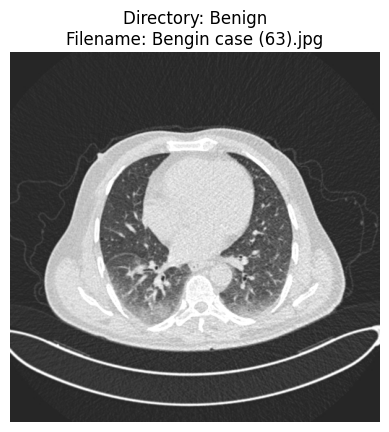

Prediction: Benign (True: Benign) | Filename: Bengin case (63).jpg

image 1/1 /kaggle/input/lung-cancer/Lungnew/test/Benign/Bengin case (35).jpg: 224x224 Benign 0.63, Normal 0.37, Malignant 0.00, 10.8ms
Speed: 3.8ms preprocess, 10.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


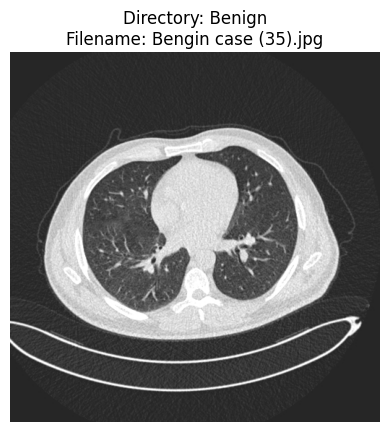

Prediction: Benign (True: Benign) | Filename: Bengin case (35).jpg

image 1/1 /kaggle/input/lung-cancer/Lungnew/test/Benign/Bengin case (62).jpg: 224x224 Benign 1.00, Normal 0.00, Malignant 0.00, 10.8ms
Speed: 4.6ms preprocess, 10.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


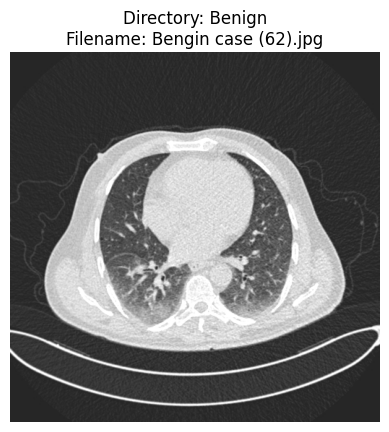

Prediction: Benign (True: Benign) | Filename: Bengin case (62).jpg

image 1/1 /kaggle/input/lung-cancer/Lungnew/test/Benign/Bengin case (98).jpg: 224x224 Benign 0.98, Normal 0.02, Malignant 0.00, 10.8ms
Speed: 4.0ms preprocess, 10.8ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


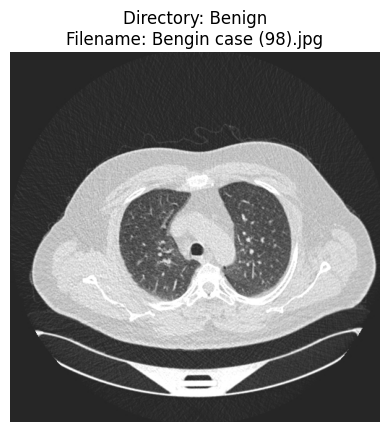

Prediction: Benign (True: Benign) | Filename: Bengin case (98).jpg

image 1/1 /kaggle/input/lung-cancer/Lungnew/test/Benign/Bengin case (25).jpg: 224x224 Benign 0.97, Normal 0.03, Malignant 0.00, 10.9ms
Speed: 3.9ms preprocess, 10.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


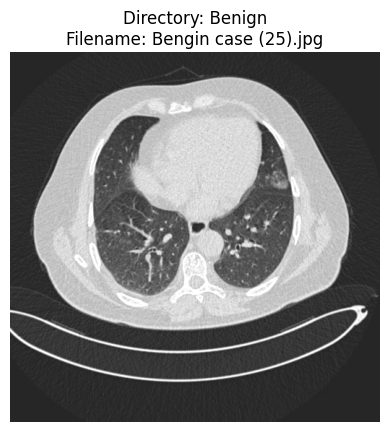

Prediction: Benign (True: Benign) | Filename: Bengin case (25).jpg

image 1/1 /kaggle/input/lung-cancer/Lungnew/test/Normal/Normal case (90).jpg: 224x224 Normal 1.00, Benign 0.00, Malignant 0.00, 10.8ms
Speed: 3.8ms preprocess, 10.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


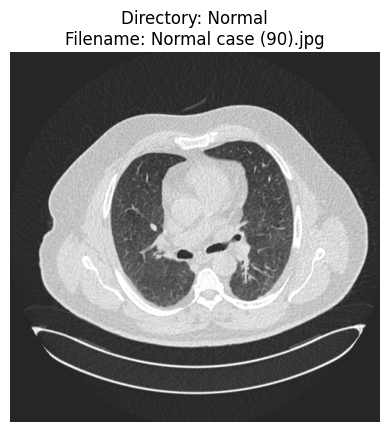

Prediction: Normal (True: Normal) | Filename: Normal case (90).jpg

image 1/1 /kaggle/input/lung-cancer/Lungnew/test/Normal/Normal case (188).jpg: 224x224 Normal 1.00, Benign 0.00, Malignant 0.00, 10.9ms
Speed: 3.9ms preprocess, 10.9ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


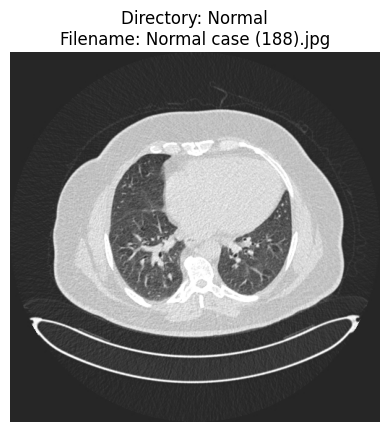

Prediction: Normal (True: Normal) | Filename: Normal case (188).jpg

image 1/1 /kaggle/input/lung-cancer/Lungnew/test/Normal/Normal case (202).jpg: 224x224 Normal 0.98, Benign 0.02, Malignant 0.00, 10.8ms
Speed: 3.8ms preprocess, 10.8ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


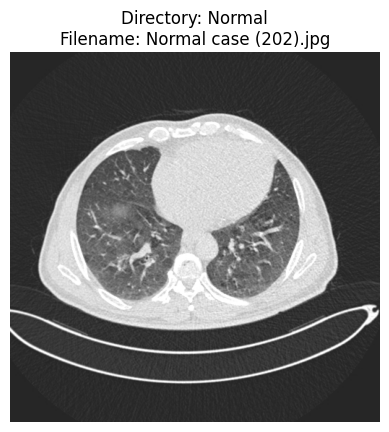

Prediction: Normal (True: Normal) | Filename: Normal case (202).jpg

image 1/1 /kaggle/input/lung-cancer/Lungnew/test/Normal/Normal case (357).jpg: 224x224 Normal 1.00, Benign 0.00, Malignant 0.00, 10.9ms
Speed: 4.0ms preprocess, 10.9ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


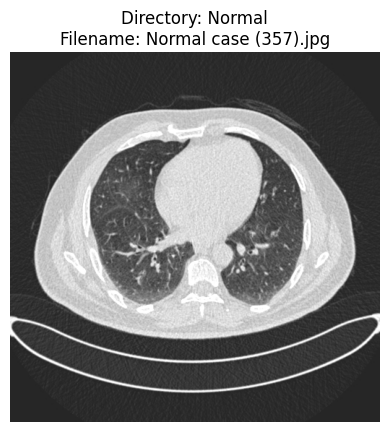

Prediction: Normal (True: Normal) | Filename: Normal case (357).jpg

image 1/1 /kaggle/input/lung-cancer/Lungnew/test/Normal/Normal case (307).jpg: 224x224 Normal 1.00, Benign 0.00, Malignant 0.00, 10.9ms
Speed: 4.2ms preprocess, 10.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


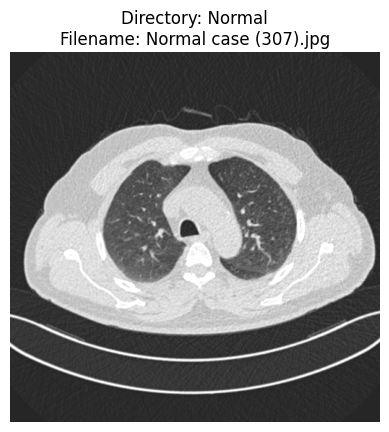

Prediction: Normal (True: Normal) | Filename: Normal case (307).jpg

image 1/1 /kaggle/input/lung-cancer/Lungnew/test/Malignant/Malignant case (212).jpg: 224x224 Malignant 1.00, Benign 0.00, Normal 0.00, 10.8ms
Speed: 5.8ms preprocess, 10.8ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


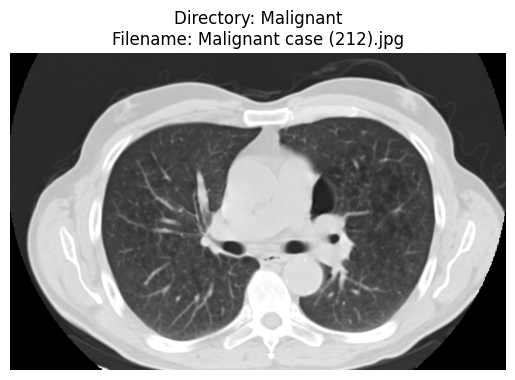

Prediction: Malignant (True: Malignant) | Filename: Malignant case (212).jpg

image 1/1 /kaggle/input/lung-cancer/Lungnew/test/Malignant/Malignant case (230).jpg: 224x224 Malignant 1.00, Normal 0.00, Benign 0.00, 10.8ms
Speed: 4.3ms preprocess, 10.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


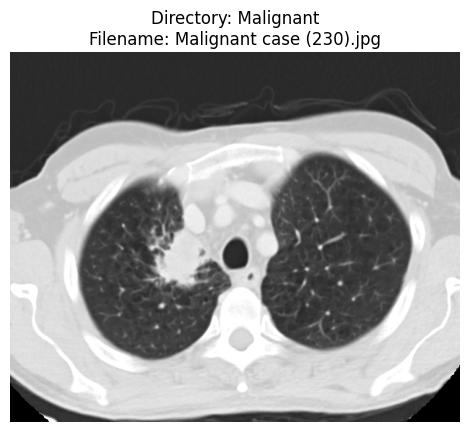

Prediction: Malignant (True: Malignant) | Filename: Malignant case (230).jpg

image 1/1 /kaggle/input/lung-cancer/Lungnew/test/Malignant/Malignant case (302).jpg: 224x224 Malignant 1.00, Benign 0.00, Normal 0.00, 10.8ms
Speed: 3.9ms preprocess, 10.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


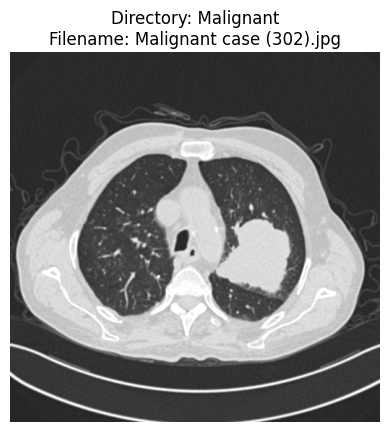

Prediction: Malignant (True: Malignant) | Filename: Malignant case (302).jpg

image 1/1 /kaggle/input/lung-cancer/Lungnew/test/Malignant/Malignant case (196).jpg: 224x224 Malignant 1.00, Normal 0.00, Benign 0.00, 10.8ms
Speed: 4.0ms preprocess, 10.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


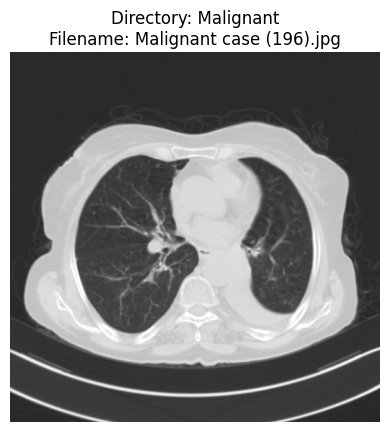

Prediction: Malignant (True: Malignant) | Filename: Malignant case (196).jpg

image 1/1 /kaggle/input/lung-cancer/Lungnew/test/Malignant/Malignant case (54).jpg: 224x224 Malignant 1.00, Benign 0.00, Normal 0.00, 10.8ms
Speed: 3.9ms preprocess, 10.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


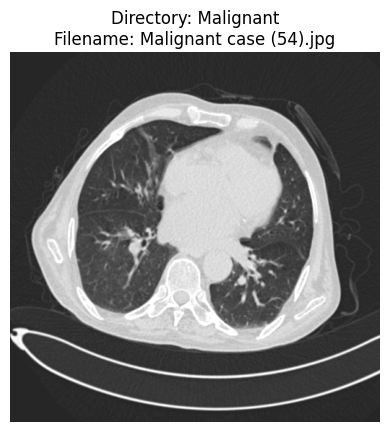

Prediction: Malignant (True: Malignant) | Filename: Malignant case (54).jpg

Test Accuracy: 100.00%
15 15
No severe overfitting detected. The model generalizes well.


In [20]:
import os
import glob
import random
import matplotlib.pyplot as plt
import cv2

# Define dataset path
DATASET_PATH = "/kaggle/input/lung-cancer/Lungnew"
TEST_PATH = os.path.join(DATASET_PATH, "test")

# Get all test images grouped by directory
test_images = glob.glob(os.path.join(TEST_PATH, "**", "*.jpg"), recursive=True)

# Organize images by directory
dir_images = {}
for img_path in test_images:
    directory = os.path.dirname(img_path)
    dir_images.setdefault(directory, []).append(img_path)

# Variables to track test accuracy
correct = 0
total = 0

# Process up to 5 images per directory
for directory, images in dir_images.items():
    random.shuffle(images)  # Shuffle the images list
    selected_images = images[:min(5, len(images))]  # Select first 5 images


    for img_path in selected_images:
        # Predict the image using the already trained model
        results = model.predict(img_path)

        # Extract filename
        filename = os.path.basename(img_path)

        # Display the image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Directory: {os.path.basename(directory)}\nFilename: {filename}")
        plt.show()

        # Extract prediction results
        if hasattr(results[0], "probs"):
            probs = results[0].probs.data.tolist()
            class_names = results[0].names
            predicted_class = class_names[probs.index(max(probs))]  # Class with highest probability
        else:
            predicted_class = "Unknown"

        # Compare with true label (directory name)
        true_label = os.path.basename(directory)
        if predicted_class == true_label:
            correct += 1
        total += 1

        # Print prediction results
        print(f"Prediction: {predicted_class} (True: {true_label}) | Filename: {filename}")

# Compute test accuracy
test_acc = (correct / total) * 100 if total > 0 else 0
print(f"\nTest Accuracy: {test_acc:.2f}%")

print(total,correct)
# Overfitting Analysis
train_acc = train_results.top1 * 100  # Ensure train_results is obtained from training
if train_acc - test_acc > 10:
    print("Warning: Overfitting detected! The model performs significantly better on training data than test data.")
elif test_acc < 50:
    print("Warning: Low test accuracy. The model might need improvements.")
else:
    print("No severe overfitting detected. The model generalizes well.")
